# SuperFoodMax Sales Analysis and Forecasting: A Data-Driven Approach

**This project has been submitted as my final capstone project for the Business Analytics with SQL and Python Course at RMIT University.**

# Table of Contents

1. [Business Questions](#business-questions)
2. [Legal and Ethical Considerations](#legal-and-ethical-considerations)
3. [Data Cleaning](#data-cleaning)
   - 3.1. [Handling Missing Entries](#handling-missing-entries)
   - 3.2. [Correct Data Types](#correct-data-types)
   - 3.3. [Removing Duplicates](#removing-duplicates)
   - 3.4. [Standardising Categorical Values](#standardising-categorical-values)
   - 3.5. [Dealing with Outliers](#dealing-with-outliers)
   - 3.6. [Renaming Columns for Readability](#renaming-columns-for-readability)
4. [Data Exploring](#data-exploring)
   - 4.1. [Revenue Trend Analysis Over Time](#revenue-trend-analysis-over-time)
   - 4.2. [Revenue Analysis Based on Customer Profile](#revenue-analysis-based-on-customer-profile)
      - 4.2.1. [Loyalty](#loyalty)
      - 4.2.2. [Living Arrangement](#living-arrangement)
      - 4.2.3. [Age Band](#age-band)
   - 4.3. [Revenue Analysis Across Business Categories](#revenue-analysis-across-business-categories)
      - 4.3.1. [Total revenue and number of commodities sold by each department](#total-revenue-and-number-of-commodities-sold-by-each-department)
      - 4.3.2. [Sale distribution across departments and loyalty groups](#sale-distribution-across-departments-and-loyalty-groups)
      - 4.3.3. [Revenue distribution across departments and customer living situations](#revenue-distribution-across-departments-and-customer-living-situations)
      - 4.3.4. [Sale distribution across departments and age band of the customers](#sale-distribution-across-departments-and-age-band-of-the-customers)
      - 4.3.5. [Total revenue and number of commodities sold from each brand](#total-revenue-and-number-of-commodities-sold-from-each-brand)
      - 4.3.6. [Revenue distribution across brands and loyalty groups](#revenue-distribution-across-brands-and-loyalty-groups)
      - 4.3.7. [Revenue performance of brands across different living arrangements](#revenue-performance-of-brands-across-different-living-arrangements)
      - 4.3.8. [Revenue distribution by brand and age band of the customers](#revenue-distribution-by-brand-and-age-band-of-the-customers)
      - 4.3.9. [Revenue of the top and bottom 10 commodities](#revenue-of-the-top-and-bottom-10-commodities)
      - 4.3.10. [Revenue trends across commodities and loyalty segments](#revenue-trends-across-commodities-and-loyalty-segments)
      - 4.3.11. [Revenue performance of commodities across different living arrangements](#revenue-performance-of-commodities-across-different-living-arrangements)
      - 4.3.12. [Commodity revenues breakdown by age groups of the customers](#commodity-revenues-breakdown-by-age-groups-of-the-customers)
5. [Data-Driven Sales Forecasting with Machine Learning](#data-driven-sales-forecasting-with-machine-learning)
   - 5.1. [Decision Tree Regression (DTR)](#decision-tree-regression-dtr)
   - 5.2. [Random Forest Regression (RFR)](#random-forest-regression-rfr)
   - 5.3. [XGBoost Regression (XGBR)](#xgboost-regression-xgbr)
   - 5.4. [Comparing Machine Learning Models](#comparing-machine-learning-models)
   - 5.5. [Forecasting Future Revenue Using Decision Tree Regression](#forecasting-future-revenue-using-decision-tree-regression)
6. [Recommendations](#recommendations)


# 1. Business Questions

<div style="font-size:18px; line-height:2;">
    
SuperFoodsMax decision-makers ask us to provide insights that can support a strategy to lift sales revenue by 5% over the next two years.
  
Questions:

•	How do seasonal trends affect overall sales? How does total revenue change over time?

•	Which loyalty group generates the highest revenue, and which group is the smallest?

•	How can the company convert non-loyal customers into regular customers?

•	What is the revenue contribution of the youngest age groups compared to older groups?

•	Which living arrangement group represents the largest segment in size and revenue?

•	How can the company increase revenue from the single female customer segment?

•	Which age group represents the largest segment in terms of size and revenue?

•	How can the company build long-term loyalty among younger consumers?

•	What are the top departments and commodities in terms of sales?

•	What is the expected revenue for the next two years?


# 2. Legal and Ethical Considerations

<div style="font-size:18px; line-height:2;">
    
- The data doesn’t have any personal information that could be used to identify individuals when shared.

- The dataset is collected from legitimate sources to ensure that copyright is preserved.

- The analysis of this data provides accurate information that leads to high-quality decision-making.

- The use of this data is fair, and unjust biases have been avoided.

- The customers are informed regarding their data usage, privacy, and protection.

- All data analysis carried out follows rigorous guidelines, to ensure accountability and honesty via the decision-making stages.

- Dealing with this data complies with the Privacy Act 1988., which governs standards, rights, and obligations related to dealing with data.

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import bottleneck as bn
import plotly.graph_objects as go
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import plotly.io as pio
pio.renderers.default = "notebook_connected"

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the data for analysis
Super_Food_Data = pd.read_csv('Data.csv')
Super_Food_Data.head(100)

,Fi,product_id,basket_id,loyalty,household_type,age_band,department,brand,commodity,store,price,transaction_date
0,15803,1131974,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Baked bread/buns/rolls,374,0.99,5/10/2020
1,15803,1051516,57266,Loyalist,1 adult with kids,19-24,Produce,national,Vegetables - all others,374,0.70,24/10/2020
2,15803,967254,57266,Loyalist,1 adult with kids,19-24,Pharmaceutical,national,Cold and flu,374,1.68,18/10/2020
3,15803,1134222,57266,Loyalist,1 adult with kids,19-24,Grocery,private,Paper housewares,374,2.59,23/10/2020
4,15803,1003421,57266,Loyalist,1 adult with kids,19-24,Grocery,national,Soup,374,0.60,27/10/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
95,15820,12452939,52166,Loyalist,2 adults with kids,25-34,Meat,private,Breakfast sausage/sandwiches,374,7.98,6/8/2021
96,15820,936914,52166,Loyalist,2 adults with kids,25-34,Meat,national,Bacon,374,2.59,12/8/2021
97,15820,868499,52166,Loyalist,2 adults with kids,25-34,Seafood,national,Seafood-misc,374,2.19,4/8/2021
98,15822,9837058,52237,Loyalist,1 adult with kids,35-44,Nutrition,national,Fitness/diet,374,1.00,31/08/2021


In [3]:
Super_Food_Data.isnull().sum()

Fi                  0
product_id          0
basket_id           0
loyalty             0
household_type      0
age_band            0
department          0
brand               0
commodity           0
store               0
price               0
transaction_date    0
dtype: int64

In [4]:
print(type(Super_Food_Data))

<class 'pandas.core.frame.DataFrame'>


# 3. Data Cleaning

## 3.1. Handling Missing Entries

In [5]:
# Checking for missing data
Super_Food_Data.isnull().sum()

Fi                  0
product_id          0
basket_id           0
loyalty             0
household_type      0
age_band            0
department          0
brand               0
commodity           0
store               0
price               0
transaction_date    0
dtype: int64

<div style="font-size:18px;">
- As shown in the above results, there are no missing values in our data. 

## 3.2. Correct Data Types

In [6]:
# Checking the data types:
print(Super_Food_Data.dtypes)

Fi                    int64
product_id            int64
basket_id             int64
loyalty              object
household_type       object
age_band             object
department           object
brand                object
commodity            object
store                 int64
price               float64
transaction_date     object
dtype: object


In [7]:
# Converting transaction data coloumn to datetime format, to ensure all the dates have the same format: 
Super_Food_Data['transaction_date'] = pd.to_datetime(Super_Food_Data['transaction_date'],format ='%d/%m/%Y')
print(Super_Food_Data['transaction_date'].dtype)

datetime64[ns]


In [8]:
# Converting object data type to categorical type:
categorical_data =['loyalty','household_type','age_band','department','brand','commodity']

for x in categorical_data:
    Super_Food_Data[x] = Super_Food_Data[x].astype('category')
    
print(Super_Food_Data.dtypes)

Fi                           int64
product_id                   int64
basket_id                    int64
loyalty                   category
household_type            category
age_band                  category
department                category
brand                     category
commodity                 category
store                        int64
price                      float64
transaction_date    datetime64[ns]
dtype: object


<div style="font-size:18px;">
- Now, all columns have proper data types

## 3.3. Removing Duplicates

In [9]:
# Checking duplicates in the datasets
Super_Food_Data.duplicated().sum()

59

<div style="font-size:18px; line-height:2;">
- There are only 59 duplicate rows out of 77,750, which is an insignificant proportion. Thus, these duplicate rows will be deleted without the need for further investigation.

In [10]:
# Deleting duplicated rows
Super_Food_Data = Super_Food_Data.drop_duplicates(keep='first')
Super_Food_Data.duplicated().sum()

0

## 3.4. Standardising Categorical Values

In [11]:
# Checking household_type column data: 
Super_Food_Data['household_type'].unique()

['1 adult with kids', 'Single female', '2 adults with no kids', '2 adults with kids', 'Single male']
Categories (5, object): ['1 adult with kids', '2 adults with kids', '2 adults with no kids', 'Single female', 'Single male']

In [12]:
# Refining household type values
Refined_category = {'1 adult with kids': 'Single parent',
    'Single female': 'Single female',
    '2 adults with no kids': 'Couple',
    '2 adults with kids': 'Family',
    'Single male': 'Single male'}

Super_Food_Data['household_type']= Super_Food_Data['household_type'].replace(Refined_category)

Super_Food_Data['household_type'].unique()

['Single parent', 'Single female', 'Couple', 'Family', 'Single male']
Categories (5, object): ['Single parent', 'Family', 'Couple', 'Single female', 'Single male']

In [13]:
# Checking age_band column data:
Super_Food_Data['age_band'].unique()

['19-24', '25-34', '35-44', '45-54', 'Greater than 65', '55-64']
Categories (6, object): ['19-24', '25-34', '35-44', '45-54', '55-64', 'Greater than 65']

In [14]:
# Refining age band values
Super_Food_Data['age_band']= Super_Food_Data['age_band'].replace({'Greater than 65': 'Above 65'})
Super_Food_Data['age_band'].unique()

['19-24', '25-34', '35-44', '45-54', 'Above 65', '55-64']
Categories (6, object): ['19-24', '25-34', '35-44', '45-54', '55-64', 'Above 65']

In [15]:
# Standardise all categorical column

# categorical columns
categorical_data =['loyalty','household_type','department','brand','commodity']

# Remove spaces & convert to Title Case
for x in categorical_data:
    Super_Food_Data[x] = Super_Food_Data[x].astype(str).str.strip().str.title().astype('category')

## 3.5. Dealing with Outliers

In [16]:
# Checking if there is outlier in the numerical column
# List of columns that are not categorical
Not_categorical_col = ['Fi', 'product_id', 'basket_id', 'store', 'price'] 

# Select only numeric columns from DataFrame for outlier detection
numeric_data = Super_Food_Data[Not_categorical_col]

# Calculate the Interquartile Range (IQR)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Corrected condition for outliers
outliers = Super_Food_Data[(numeric_data < lower_bound) | (numeric_data > upper_bound)]

# Check if the DataFrame contains any outliers
if outliers.dropna().empty:
    print("The DataFrame contains no outliers.")
else:
    print("The DataFrame contains outliers.")

The DataFrame contains no outliers.


In [17]:
# Checking if the date range as expected
min_date = Super_Food_Data['transaction_date'].min()
max_date = Super_Food_Data['transaction_date'].max()
print(f"The range of the 'transaction_date' column is from {min_date} to {max_date}.")

The range of the 'transaction_date' column is from 2019-01-01 00:00:00 to 2022-05-31 00:00:00.


<div style="font-size:18px; line-height:2;">
- The date range is as expected since the dataset contains information about the company from 2019 to 2022.

In [18]:
# Checking if there are negative values in price column
print(Super_Food_Data[Super_Food_Data['price'] < 0])

Empty DataFrame
Columns: [Fi, product_id, basket_id, loyalty, household_type, age_band, department, brand, commodity, store, price, transaction_date]
Index: []


## 3.6. Renaming Columns for Readability

In [19]:
# For clarity, Fi, and household columns will be renamed
Super_Food_Data.rename(columns={'Fi':'customer_id', 'household_type':'living_arrangement'},inplace =True)

In [20]:
# Checking the dataframe after the cleaning process
Super_Food_Data.head(1000)

,customer_id,product_id,basket_id,loyalty,living_arrangement,age_band,department,brand,commodity,store,price,transaction_date
0,15803,1131974,57266,Loyalist,Single Parent,19-24,Grocery,Private,Baked Bread/Buns/Rolls,374,0.99,2020-10-05
1,15803,1051516,57266,Loyalist,Single Parent,19-24,Produce,National,Vegetables - All Others,374,0.70,2020-10-24
2,15803,967254,57266,Loyalist,Single Parent,19-24,Pharmaceutical,National,Cold And Flu,374,1.68,2020-10-18
3,15803,1134222,57266,Loyalist,Single Parent,19-24,Grocery,Private,Paper Housewares,374,2.59,2020-10-23
4,15803,1003421,57266,Loyalist,Single Parent,19-24,Grocery,National,Soup,374,0.60,2020-10-27
...,...,...,...,...,...,...,...,...,...,...,...,...
996,15991,6424447,54866,Promiscuous,Couple,25-34,Grocery,Private,Bag Snacks,374,1.00,2020-09-18
997,15991,1007316,54866,Promiscuous,Couple,25-34,Pharmaceutical,National,Brooms And Mops,374,1.00,2020-09-24
998,15991,970605,54866,Promiscuous,Couple,25-34,Meat,Private,Frozen Meat,374,3.29,2020-09-12
999,15991,844179,54866,Promiscuous,Couple,25-34,Meat,National,Beef,374,4.12,2020-09-14


<div style="font-size:24px; line-height:2;">
- After the cleaning process, the data is ready for analysis now. 

# 4. Data Exploring

## 4.1. Revenue Trend Analysis Over Time

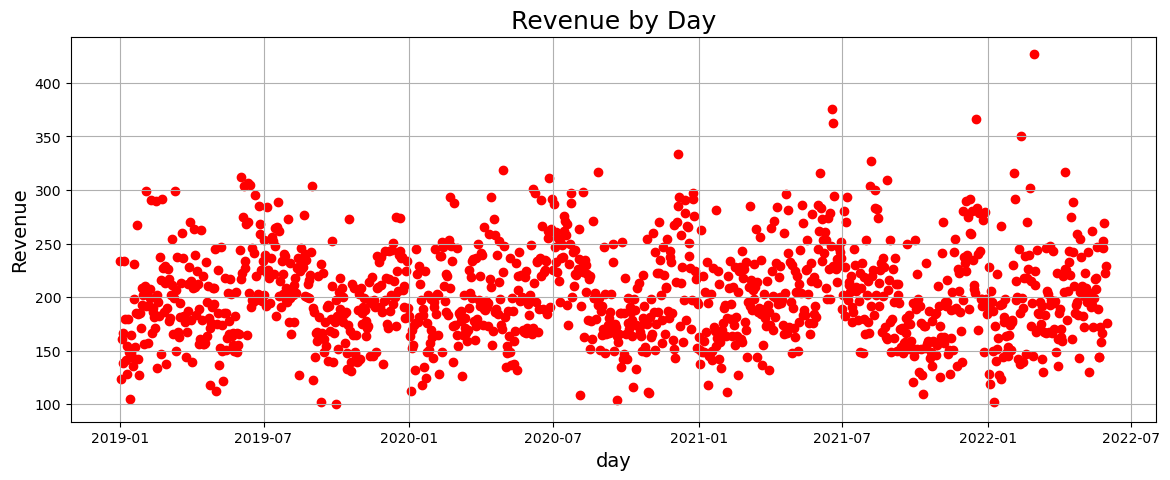

In [21]:
# Visuliza the daily revenue trend. 
revenue_by_day = Super_Food_Data.groupby('transaction_date')['price'].sum()

plt.figure(figsize=(14, 5))
plt.scatter(revenue_by_day.index, revenue_by_day.values, marker='o', color='r')
plt.title('Revenue by Day', fontsize=18)
plt.xlabel('day', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.grid(True)
plt.show()



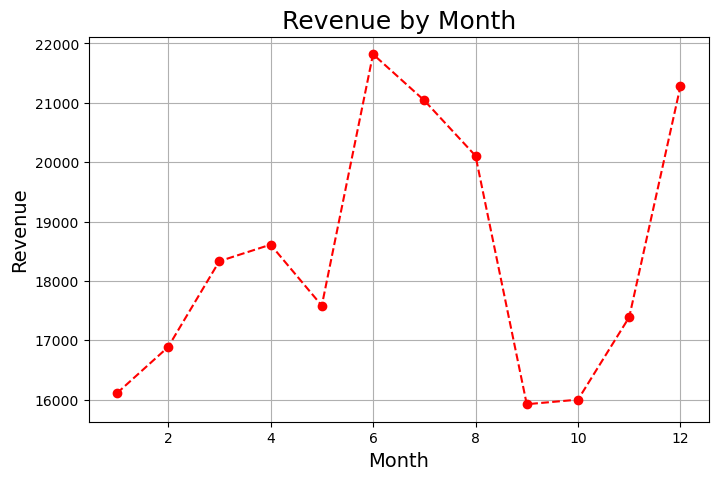

In [22]:
# Exculde year 2022, because it only contains the data for the first five months
Data_exculde_2022 = Super_Food_Data[Super_Food_Data['transaction_date'].dt.year != 2022]

# Calculate the yearly revenue 
Data_exculde_2022['month'] = Data_exculde_2022['transaction_date'].dt.month
revenue_monthly = Data_exculde_2022.groupby('month')['price'].sum()

# Visuliza the revenue trend by year. 
plt.figure(figsize =(8,5))
plt.plot(revenue_monthly.index, revenue_monthly.values, marker='o', linestyle='--', color='r')
plt.title('Revenue by Month',fontsize=18)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Revenue',fontsize=14)
plt.grid(True)
plt.show()

<div style="font-size:18px; line-height:2;">
The highest monthly sales take place in June, likely due to the end of the financial year, when lots of deals and promotions are offered and people are looking for tax deductions. Additionally, December also sees high sales due to the holiday season. The lowest revenues are in September and October, which can be explained by people trying to save money as they get closer to the holiday season.

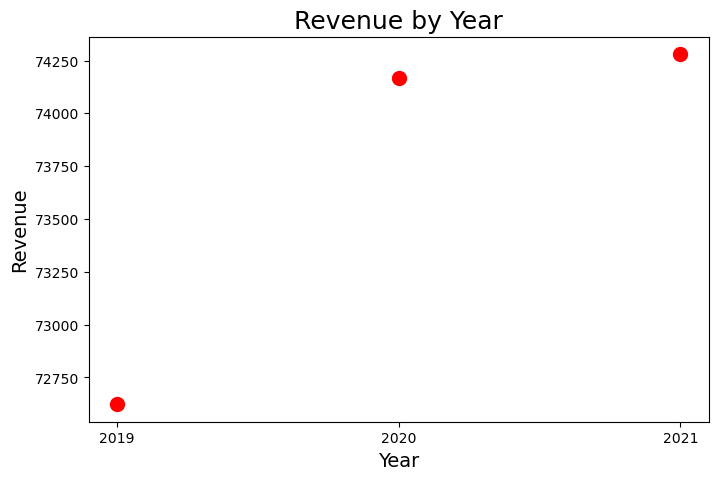

In [23]:
# Calculate the yearly revenue 
Super_Food_Data['year'] = Super_Food_Data['transaction_date'].dt.year
revenue_yearly = Super_Food_Data[Super_Food_Data['year'] != 2022].groupby('year')['price'].sum()

# Visualize the revenue trend by year. 
plt.figure(figsize=(8, 5))
plt.plot(revenue_yearly.index, revenue_yearly.values, marker='o', linestyle='', color='r', markersize=10)
plt.title('Revenue by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(revenue_yearly.index)  # Set x-ticks to show only the years
plt.show()

<div style="font-size:18px; line-height:2;">
The yearly revenue shows significant growth from 2019 to 2021, with a slight increase in 2021. This can be explained by the economy starting to recover after the implications of the COVID-19 pandemic.


## 4.2. Revenue Analysis Based on Customer Profile

### 4.2.1. Loyality

In [24]:
# identify the size of each category in loyalty column
loyalty_categ_size = Super_Food_Data.groupby('loyalty')['customer_id'].nunique().reset_index()
loyalty_categ_size.columns = ['loyalty_group', 'count']
loyalty_categ_size

,loyalty_group,count
0,First Time Buyer,48
1,Loyalist,1341
2,Promiscuous,1879


In [25]:
# Total revenue for each loyalty group
revenue_by_loyalty_group = Super_Food_Data.groupby('loyalty')['price'].sum().reset_index()
revenue_by_loyalty_group.rename(columns={'price': 'revenue', 'loyalty':'loyalty_group'}, inplace=True)
revenue_by_loyalty_group

,loyalty_group,revenue
0,First Time Buyer,3524.53
1,Loyalist,102222.87
2,Promiscuous,145233.07


In [26]:
# Average revenue for each loyalty group
average_revenue_by_loyalty = Super_Food_Data.groupby('loyalty')['price'].mean().reset_index()
average_revenue_by_loyalty.rename(columns={'price': 'average_revenue', 'loyalty':'loyalty_group'}, inplace=True)
average_revenue_by_loyalty

,loyalty_group,average_revenue
0,First Time Buyer,3.108051
1,Loyalist,3.229280
2,Promiscuous,3.234445


In [27]:
# Combine both the count and total revenue dataframe
DataFrame = pd.merge(loyalty_categ_size, revenue_by_loyalty_group, on='loyalty_group', how='right')
DataFrame

,loyalty_group,count,revenue
0,First Time Buyer,48,3524.53
1,Loyalist,1341,102222.87
2,Promiscuous,1879,145233.07


In [60]:
# Scatter plot 
Fig = px.scatter(
    DataFrame,
    x='count',  
    y='revenue',  
    size='count',  
    color='revenue',  
    hover_name='loyalty_group',  
    text='loyalty_group',  
    size_max=70,
    color_continuous_scale='RdYlGn')

# Adjust the text position 
Fig.update_traces(textposition='bottom center')

# Update the layout to add titles
Fig.update_layout(
    title='Revenue based on loyalty groups', title_x =0.5, title_y=0.95,
    xaxis_title='Number of Customers per loyalty category',
    yaxis_title='Total Revenue',
    showlegend=False)


Fig.show()


<div style="font-size:18px; line-height:2;">
Promiscuous shoppers generate the highest revenue, while first-time buyers are the smallest group. The company should aim to convert first-time buyers and promiscuous shoppers to become loyal by offering personalized promotions and rewards that increase the quality of the shopping experience and create a sense of belonging.


### 4.2.2. Living Arrangement

In [29]:
# identify the size of each category in living_arrangement column
living_arrangement_size = Super_Food_Data.groupby('living_arrangement')['customer_id'].nunique().reset_index()
living_arrangement_size.columns = ['living_arrangement', 'Count']
living_arrangement_size

,living_arrangement,Count
0,Couple,708
1,Family,976
2,Single Female,279
3,Single Male,498
4,Single Parent,807


In [30]:
# Total revenue for each living arrangement group
revenue_by_living_arrangement = Super_Food_Data.groupby('living_arrangement')['price'].sum().reset_index()
revenue_by_living_arrangement.rename(columns={'price': 'Revenue'}, inplace=True)
revenue_by_living_arrangement

,living_arrangement,Revenue
0,Couple,55423.07
1,Family,72998.68
2,Single Female,22390.94
3,Single Male,39411.87
4,Single Parent,60755.91


In [31]:
# Average revenue for each living arrangement group
average_revenue_by_living_arrangement = Super_Food_Data.groupby('living_arrangement')['price'].mean().reset_index()
average_revenue_by_living_arrangement.rename(columns={'price': 'Average_Revenue'}, inplace=True)
average_revenue_by_living_arrangement

,living_arrangement,Average_Revenue
0,Couple,3.260372
1,Family,3.202820
2,Single Female,3.252606
3,Single Male,3.273955
4,Single Parent,3.201386


In [32]:
# Combine both the count and total revenue dataframe
Merged_Data = pd.merge(living_arrangement_size, revenue_by_living_arrangement, how='right', on ='living_arrangement')
Merged_Data

,living_arrangement,Count,Revenue
0,Couple,708,55423.07
1,Family,976,72998.68
2,Single Female,279,22390.94
3,Single Male,498,39411.87
4,Single Parent,807,60755.91


In [61]:
# Scatter plot 
Fig = px.scatter(
    Merged_Data,
    x='Count',  
    y='Revenue',  
    size='Count',  
    color='Revenue',  
    hover_name='living_arrangement',  
    text='living_arrangement',  
    size_max=40,
    color_continuous_scale='RdYlGn')

# Adjust the text position 
Fig.update_traces(textposition='bottom center')

# Update the layout to add titles
Fig.update_layout(
    title='Revenue based on living arrangement groups', title_x =0.5, title_y=0.95,
    xaxis_title='Number of Customers per living arrangement groups',
    yaxis_title='Total Revenue',
    showlegend=False)


Fig.show()

<div style="font-size:18px; line-height:2;">
Families with kids, whether single-parent or two-parent, represent the largest groups in terms of size and revenue and the single female group is the smallest one. To increase revenue, the company should offer targeted promotions and expand the variety of female-friendly products. 


### 4.2.3. Age Band

In [34]:
# identify the size of each category in age_band column
age_band_size = Super_Food_Data.groupby('age_band')['customer_id'].nunique().reset_index()
age_band_size.columns = ['age_band', 'Count']
age_band_size

,age_band,Count
0,19-24,1633
1,25-34,557
2,35-44,210
3,45-54,852
4,55-64,8
5,Above 65,8


In [35]:
# Total revenue for each age band group
revenue_by_age_band = Super_Food_Data.groupby('age_band')['price'].sum().reset_index()
revenue_by_age_band.rename(columns={'price': 'Revenue'}, inplace=True)
revenue_by_age_band

,age_band,Revenue
0,19-24,129376.57
1,25-34,41361.09
2,35-44,15295.23
3,45-54,64071.20
4,55-64,450.64
5,Above 65,425.74


In [36]:
# Average revenue for each age band group
average_revenue_by_age_band = Super_Food_Data.groupby('age_band')['price'].mean().reset_index()
average_revenue_by_age_band.rename(columns={'price': 'Average_Revenue'}, inplace=True)
average_revenue_by_age_band

,age_band,Average_Revenue
0,19-24,3.264118
1,25-34,3.208525
2,35-44,3.168026
3,45-54,3.195412
4,55-64,3.265507
5,Above 65,2.896190


In [37]:
# Combine both the count and total revenue dataframe
Dataframe_combined = pd.merge(age_band_size, revenue_by_age_band, how='right', on ='age_band')
Dataframe_combined

,age_band,Count,Revenue
0,19-24,1633,129376.57
1,25-34,557,41361.09
2,35-44,210,15295.23
3,45-54,852,64071.20
4,55-64,8,450.64
5,Above 65,8,425.74


In [63]:
# Filter out 'Above 65' from the DataFrame
filtered_df = Dataframe_combined[Dataframe_combined['age_band'] != 'Above 65']

# Create the scatter plot
Fig = px.scatter(
    filtered_df,
    x='Count',  
    y='Revenue',  
    size='Count',  
    color='Revenue',  
    hover_name='age_band',  
    text='age_band',  
    size_max=50,
    color_continuous_scale='RdYlGn'
)

# Adjust the text position
Fig.update_traces(textposition='bottom center')

# Update the layout to add titles
Fig.update_layout(
    title='Revenue based on age band groups', title_x=0.5, title_y=0.95,
    xaxis_title='Number of Customers per age band groups',
    yaxis_title='Total Revenue',
    showlegend=False
)

# Show the plot
Fig.show()

<div style="font-size:18px; line-height:2;">
The youngest group represents the largest demographic in terms of size and revenue, while older groups, particularly those above 55, constitute the smallest group. The company should focus on cultivating loyalty among younger consumers, as this will secure long-term growth for the business.


## 4.3. Revenue Analysis Across Business Categories

### 4.3.1. Total revenue and number of commodities sold by each department

In [64]:
# Identify number of commodities per department
dept_commodities = Super_Food_Data.groupby('department')['commodity'].nunique().reset_index()
dept_commodities

,department,commodity
0,Cosmetics,5
1,Deli,12
2,Floral,3
3,Grocery,90
4,Meat,14
5,Nutrition,21
6,Pastry,8
7,Pharmaceutical,74
8,Produce,28
9,Salad Bar,2


In [65]:
# Total revenue for each age department
revenue_by_department = Super_Food_Data.groupby('department')['price'].sum().reset_index()
revenue_by_department.rename(columns={'price': 'revenue'}, inplace=True)
revenue_by_department

,department,revenue
0,Cosmetics,2528.65
1,Deli,15085.84
2,Floral,2588.94
3,Grocery,63534.81
4,Meat,52392.34
5,Nutrition,8809.72
6,Pastry,13725.72
7,Pharmaceutical,44603.66
8,Produce,37207.43
9,Salad Bar,1580.44


In [66]:
# Combine both the count and total revenue dataframe
Merged_Dataframe = pd.merge(dept_commodities, revenue_by_department, how='left', on ='department')
Merged_Dataframe = Merged_Dataframe.sort_values(by='revenue', ascending=False)
Merged_Dataframe

,department,commodity,revenue
3,Grocery,90,63534.81
4,Meat,14,52392.34
7,Pharmaceutical,74,44603.66
8,Produce,28,37207.43
1,Deli,12,15085.84
6,Pastry,8,13725.72
10,Seafood,4,8922.92
5,Nutrition,21,8809.72
2,Floral,3,2588.94
0,Cosmetics,5,2528.65


In [67]:
# Bar plot
bar_plot = px.bar(
    Merged_Dataframe,
    x='department',  
    y='revenue',    
    text='commodity',
    color ='commodity',
    color_continuous_scale='RdYlGn',
    title='Total revenue and number of commodities sold by each department')

# Adjust layout and text properties
bar_plot.update_traces(
    textposition='outside',  
    textfont=dict(color='black'))  

# Adjust layout
bar_plot.update_layout(
    xaxis_title='Department',
    yaxis_title='Total Revenue',
    title_x =0.5, title_y=0.87
)

# Show the plot
bar_plot.show()

### 4.3.2. Sale distribution across departments and loyalty groups

In [69]:
# Total revenue by department and loyalty
department_loyalty_revenue = Super_Food_Data.groupby(['department','loyalty'])['price'].sum().reset_index()

# Get the top 5 departments by total revenue
top_departments = department_loyalty_revenue.groupby('department')['price'].sum().nlargest(5).index

# Filter data for only the top 5 departments
top_department_loyalty_revenue = department_loyalty_revenue[department_loyalty_revenue['department'].isin(top_departments)]
top_department_loyalty_revenue.head(10)

,department,loyalty,price
3,Deli,First Time Buyer,183.13
4,Deli,Loyalist,6126.76
5,Deli,Promiscuous,8775.95
9,Grocery,First Time Buyer,894.51
10,Grocery,Loyalist,25749.59
11,Grocery,Promiscuous,36890.71
12,Meat,First Time Buyer,718.21
13,Meat,Loyalist,21059.25
14,Meat,Promiscuous,30614.88
21,Pharmaceutical,First Time Buyer,687.16


In [70]:
# Create a grouped bar chart
bar_plot = px.bar(
    top_department_loyalty_revenue,
    x='department',
    y='price',
    color='loyalty', 
    barmode='group',  
    title='Sale distribution across departments and loyalty groups',
    labels={'price': 'Revenue', 'department': 'Department', 'loyalty': 'Loyalty Group'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Adjust layout
bar_plot.update_layout(
    xaxis_title='Department',
    yaxis_title='Total Revenue',
    title_x=0.48,title_y=0.87,
    xaxis={'categoryorder': 'total descending'}  
)

# Show the plot
bar_plot.show()

### 4.3.3. Revenue distribution across departments and customer living situations

In [71]:
# Total revenue by department and living arrangement of the customers
department_living_arrangement_revenue = Super_Food_Data.groupby(['department','living_arrangement'])['price'].sum().reset_index()

# Get the top 5 departments by total revenue
top_departments = department_living_arrangement_revenue.groupby('department')['price'].sum().nlargest(5).index

# Filter data for only the top 5 departments
top_department_living_arrangement_revenue = department_living_arrangement_revenue[department_living_arrangement_revenue['department'].isin(top_departments)]
top_department_living_arrangement_revenue.head(10)

,department,living_arrangement,price
5,Deli,Couple,3130.75
6,Deli,Family,4471.49
7,Deli,Single Female,1284.92
8,Deli,Single Male,2341.85
9,Deli,Single Parent,3856.83
15,Grocery,Couple,14101.22
16,Grocery,Family,18676.65
17,Grocery,Single Female,5499.22
18,Grocery,Single Male,9828.90
19,Grocery,Single Parent,15428.82


In [72]:
# Create a grouped bar chart
bar_plot = px.bar(
    top_department_living_arrangement_revenue,
    x='department',
    y='price',
    color='living_arrangement', 
    barmode='group',  
    title='Sale distribution across departments and living arrangement of the customers',
    labels={'price': 'Revenue', 'department': 'Department'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Adjust layout
bar_plot.update_layout(
    xaxis_title='Department',
    yaxis_title='Total Revenue',
    title_x=0.48,title_y=0.87,
    xaxis={'categoryorder': 'total descending'}
)

# Show the plot
bar_plot.show()

### 4.3.4. Sale distribution across departments and age band of the customers

In [73]:
# Total revenue by department and age band
department_age_band_revenue = Super_Food_Data.groupby(['department','age_band'])['price'].sum().reset_index()

# Get the top 5 departments by total revenue
top_departments = department_age_band_revenue.groupby('department')['price'].sum().nlargest(5).index

# Filter data for only the top 5 departments
top_department_age_band_revenue = department_age_band_revenue[department_age_band_revenue['department'].isin(top_departments)]
top_department_age_band_revenue.head(10)

,department,age_band,price
6,Deli,19-24,7556.58
7,Deli,25-34,2556.85
8,Deli,35-44,975.67
9,Deli,45-54,3946.81
10,Deli,55-64,25.18
11,Deli,Above 65,24.75
18,Grocery,19-24,32520.76
19,Grocery,25-34,10368.11
20,Grocery,35-44,3961.47
21,Grocery,45-54,16441.56


In [74]:
# Create a grouped bar chart
bar_plot = px.bar(
    top_department_age_band_revenue,
    x='department',
    y='price',
    color='age_band', 
    barmode='group',  
    title='Sale distribution across departments and age band of the customers',
    labels={'price': 'Revenue', 'department': 'Department'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Adjust layout
bar_plot.update_layout(
    xaxis_title='Department',
    yaxis_title='Total Revenue',
    title_x=0.48,title_y=0.87,
    xaxis={'categoryorder': 'total descending'},
)

# Show the plot
bar_plot.show()

### 4.3.5. Total revenue and number of commodities sold from each brand

In [75]:
# Identify number of commodities per brand
brand_commodities = Super_Food_Data.groupby('brand')['commodity'].nunique().reset_index()
brand_commodities

,brand,commodity
0,National,241
1,Private,163


In [76]:
# Total revenue for each each brand
revenue_by_brand = Super_Food_Data.groupby('brand')['price'].sum().reset_index()
revenue_by_brand.rename(columns={'price': 'revenue'}, inplace=True)
revenue_by_brand

,brand,revenue
0,National,201290.91
1,Private,49689.56


In [77]:
# Combine both the count and total revenue dataframe
Merged_Dataframe_01 = pd.merge(brand_commodities, revenue_by_brand, how='left', on ='brand')
Merged_Dataframe_01 = Merged_Dataframe_01.sort_values(by='revenue', ascending=False)
Merged_Dataframe_01

,brand,commodity,revenue
0,National,241,201290.91
1,Private,163,49689.56


In [78]:
# Bar plot
bar_plot = px.bar(
    Merged_Dataframe_01,
    x='brand',  
    y='revenue',    
    text='commodity',
    color ='commodity',
    color_continuous_scale='RdYlGn',
    title='Total revenue and number of commodities sold from each brand')

# Adjust layout and text properties
bar_plot.update_traces(
    textposition='outside',  
    textfont=dict(color='black'))  

# Adjust layout
bar_plot.update_layout(
    xaxis_title='Brand',
    yaxis_title='Total Revenue',
    title_x =0.5, title_y=0.87,
     bargap=0.7,
    width=700
)

# Show the plot
bar_plot.show()

### 4.3.6. Revenue distribution across brands and loyalty groups

In [80]:
# Total revenue by brand and loyalty
brand_loyalty_revenue = Super_Food_Data.groupby(['brand','loyalty'])['price'].sum().reset_index()

# Get the top 5 departments by total revenue
top_brands = brand_loyalty_revenue.groupby('brand')['price'].sum().nlargest(5).index

# Filter data for only the top 5 departments
top_brand_loyalty_revenue = brand_loyalty_revenue[brand_loyalty_revenue['brand'].isin(top_brands)]
top_brand_loyalty_revenue.head(10)

,brand,loyalty,price
0,National,First Time Buyer,2856.43
1,National,Loyalist,81785.84
2,National,Promiscuous,116648.64
3,Private,First Time Buyer,668.10
4,Private,Loyalist,20437.03
5,Private,Promiscuous,28584.43


In [81]:
# Create a grouped bar chart
bar_plot = px.bar(
    top_brand_loyalty_revenue,
    x='brand',
    y='price',
    color='loyalty', 
    barmode='group',  
    title='Sale distribution across brands and loyalty groups',
    labels={'price': 'Revenue','loyalty': 'Loyalty Group'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Adjust layout
bar_plot.update_layout(
    xaxis_title='Brand',
    yaxis_title='Total Revenue',
    title_x=0.44,title_y=0.87,
    xaxis={'categoryorder': 'total descending'},
    width=700
)

# Show the plot
bar_plot.show()

### 4.3.7. Revenue performance of brands across different living arrangements

In [82]:
# Total revenue by brand and living arrangement of the customers
brand_living_arrangement_revenue = Super_Food_Data.groupby(['brand','living_arrangement'])['price'].sum().reset_index()

# Get the top 5 departments by total revenue
top_brands = brand_living_arrangement_revenue.groupby('brand')['price'].sum().nlargest(5).index

# Filter data for only the top 5 departments
top_brand_living_arrangement_revenue = brand_living_arrangement_revenue[brand_living_arrangement_revenue['brand'].isin(top_brands)]
top_brand_living_arrangement_revenue.head(10)

,brand,living_arrangement,price
0,National,Couple,43962.30
1,National,Family,58942.90
2,National,Single Female,17765.54
3,National,Single Male,31530.77
4,National,Single Parent,49089.40
5,Private,Couple,11460.77
6,Private,Family,14055.78
7,Private,Single Female,4625.40
8,Private,Single Male,7881.10
9,Private,Single Parent,11666.51


In [83]:
# Create a grouped bar chart
bar_plot = px.bar(
    top_brand_living_arrangement_revenue,
    x='brand',
    y='price',
    color='living_arrangement', 
    barmode='group',  
    title='Sale distribution across brands and living arrangements of the customers',
    labels={'price': 'Revenue'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Adjust layout
bar_plot.update_layout(
    xaxis_title='Brand',
    yaxis_title='Total Revenue',
    title_x=0.44,title_y=0.87,
    xaxis={'categoryorder': 'total descending'},
)

# Show the plot
bar_plot.show()

### 4.3.8. Revenue distribution by brand and age band of the customers

In [84]:
# Total revenue by brand and living arrangement of the customers
brand_age_band_revenue = Super_Food_Data.groupby(['brand','age_band'])['price'].sum().reset_index()

# Get the top 5 departments by total revenue
top_brands = brand_age_band_revenue.groupby('brand')['price'].sum().nlargest(5).index

# Filter data for only the top 5 departments
top_brand_age_band_revenue = brand_age_band_revenue[brand_age_band_revenue['brand'].isin(top_brands)]
top_brand_age_band_revenue.head(10)

,brand,age_band,price
0,National,19-24,103261.92
1,National,25-34,33253.41
2,National,35-44,12283.29
3,National,45-54,51778.01
4,National,55-64,368.73
5,National,Above 65,345.55
6,Private,19-24,26114.65
7,Private,25-34,8107.68
8,Private,35-44,3011.94
9,Private,45-54,12293.19


In [85]:
# Create a grouped bar chart
bar_plot = px.bar(
    top_brand_age_band_revenue,
    x='brand',
    y='price',
    color='age_band', 
    barmode='group',  
    title='Sale distribution across brands and age band of the customers',
    labels={'price': 'Revenue'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Adjust layout
bar_plot.update_layout(
    xaxis_title='Brand',
    yaxis_title='Total Revenue',
    title_x=0.44,title_y=0.87,
    xaxis={'categoryorder': 'total descending'}
)

# Show the plot
bar_plot.show()

### 4.3.9. Revenue of the top and bottom 10 commodities

In [86]:
# sorting and getting the top 10 commoidties by sale
commodities = Super_Food_Data.groupby('commodity')['price'].sum().reset_index()
commodities.rename(columns={'price': 'revenue'}, inplace=True)
top_10_commodities_by_revenue = commodities.sort_values(by='revenue', ascending=False).head(10)
top_10_commodities_by_revenue

,commodity,revenue
20,Beef,17297.40
47,Cheese,6368.99
110,Frozen Meat,6235.09
66,Deli Meats,5912.61
203,Seafood-Frozen,5762.80
199,Salad,5710.09
149,Lunch Meat,5572.08
185,Pork,5027.56
52,Cigarettes,4826.62
37,Candy,4603.99


In [87]:
# getting the bottom 10 commoidties by sale
bottom_10_commodities_by_revenue = commodities.sort_values(by='revenue', ascending=True).head(10)
bottom_10_commodities_by_revenue

,commodity,revenue
27,Bottle Deposits,0.20
68,Deli Supplies,7.56
160,Natural Hbc,10.77
59,Continuities,14.97
208,Sewing,16.05
170,Overnight Photofinishing,22.62
24,Bird Seed,29.62
107,Frozen Drinks,29.70
92,Fireworks,29.82
192,Produce Supplies,31.40


In [88]:
# Create bar plot for the top 10 commodities by sale
bar_plot = px.bar(
      top_10_commodities_by_revenue,
      x='commodity',
      y='revenue',
      color='revenue',
      color_continuous_scale='RdYlGn',
      title='Top 10 commodities by sale'
    )

# Adjust layout
bar_plot.update_layout(
        xaxis_title='Commodity',
        yaxis_title='Total Revenue',
        title_x=0.5,title_y=0.87,
        bargap=0.3
    )

# Display the plot
bar_plot.show()

In [89]:
# Create bar plot for the bottom 10 commodities by sale
bar_plot = px.bar(
      bottom_10_commodities_by_revenue,
      x='commodity',
      y='revenue',
      color='revenue',
      color_continuous_scale='RdYlGn',
      title='bottom 10 commodities by sale'
    )

# Adjust layout
bar_plot.update_layout(
        xaxis_title='Commodity',
        yaxis_title='Total Revenue',
        title_x=0.5,title_y=0.87,
        bargap=0.3
    )

# Display the plot
bar_plot.show()

### 4.3.10. Revenue trends across commodities and loyalty segments

In [90]:
# Total revenue by commodity and loyalty
commodity_loyalty_revenue = Super_Food_Data.groupby(['commodity','loyalty'])['price'].sum().reset_index()

# Get the top 5 commodities by total revenue
top_commodity = commodity_loyalty_revenue.groupby('commodity')['price'].sum().nlargest(5).index

# Filter data for only the top 5 commodities
top_commodity_loyalty_revenue = commodity_loyalty_revenue[commodity_loyalty_revenue['commodity'].isin(top_commodity)]
top_commodity_loyalty_revenue.head()

,commodity,loyalty,price
60,Beef,First Time Buyer,222.31
61,Beef,Loyalist,6894.34
62,Beef,Promiscuous,10180.75
141,Cheese,First Time Buyer,71.43
142,Cheese,Loyalist,2531.60


In [91]:
# Create a grouped bar chart
bar_plot = px.bar(
    top_commodity_loyalty_revenue,
    x='commodity',
    y='price',
    color='loyalty', 
    barmode='group',  
    title='Sale distribution across commodities and loyalty groups',
    labels={'price': 'Revenue','loyalty': 'Loyalty Group'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Adjust layout
bar_plot.update_layout(
    xaxis_title='commodity',
    yaxis_title='Total Revenue',
    title_x=0.44,title_y=0.87,
    xaxis={'categoryorder': 'total descending'},
    
)

# Show the plot
bar_plot.show()

### 4.3.11. Revenue performance of commodities across different living arrangements

In [93]:
# Total revenue by commodity and living arrangement
commodity_living_arrangement_revenue = Super_Food_Data.groupby(['commodity','living_arrangement'])['price'].sum().reset_index()

# Get the top 5 commodities by total revenue
top_commodity = commodity_living_arrangement_revenue.groupby('commodity')['price'].sum().nlargest(5).index

# Filter data for only the top 5 commodities
top_commodity_living_arrangement_revenue = commodity_living_arrangement_revenue[commodity_living_arrangement_revenue['commodity'].isin(top_commodity)]
top_commodity_living_arrangement_revenue.head()

,commodity,living_arrangement,price
100,Beef,Couple,3639.89
101,Beef,Family,5070.47
102,Beef,Single Female,1643.55
103,Beef,Single Male,2824.82
104,Beef,Single Parent,4118.67


In [94]:
# Create a grouped bar chart
bar_plot = px.bar(
    top_commodity_living_arrangement_revenue,
    x='commodity',
    y='price',
    color='living_arrangement', 
    barmode='group',  
    title='Sale distribution across commodities and living arrangement of the customers',
    labels={'price': 'Revenue'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Adjust layout
bar_plot.update_layout(
    xaxis_title='commodity',
    yaxis_title='Total Revenue',
    title_x=0.44,title_y=0.87,
    xaxis={'categoryorder': 'total descending'},

)

# Show the plot
bar_plot.show()

### 4.3.12. Commodity revenues breakdown by age groups of the customers

In [95]:
# Total revenue by commodity and age group
commodity_age_band_revenue = Super_Food_Data.groupby(['commodity','age_band'])['price'].sum().reset_index()

# Get the top 5 commodities by total revenue
top_commodity = commodity_age_band_revenue.groupby('commodity')['price'].sum().nlargest(5).index

# Filter data for only the top 5 commodities
top_commodity_age_band_revenue = commodity_age_band_revenue[commodity_age_band_revenue['commodity'].isin(top_commodity)]
top_commodity_age_band_revenue.head()

,commodity,age_band,price
120,Beef,19-24,9113.44
121,Beef,25-34,2710.86
122,Beef,35-44,946.82
123,Beef,45-54,4483.38
124,Beef,55-64,28.02


In [96]:
# Create a grouped bar chart
bar_plot = px.bar(
    top_commodity_age_band_revenue,
    x='commodity',
    y='price',
    color='age_band', 
    barmode='group',  
    title='Sale distribution across commodities and age group of the customers',
    labels={'price': 'Revenue'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

# Adjust layout
bar_plot.update_layout(
    xaxis_title='commodity',
    yaxis_title='Total Revenue',
    title_x=0.44,title_y=0.87,
    xaxis={'categoryorder': 'total descending'},
    
)

# Show the plot
bar_plot.show()

# 5. Data-Driven Sales Forecasting with Machine Learning

**Preparing the DataFrame for Machine Learning Deployment.**

In [51]:
# Firstly, the dataframe will be prepared for applying the machine learning models:
# Copy the dataset
df = Super_Food_Data.copy()

# Convert 'transaction_date' to datetime 
df["transaction_date"] = pd.to_datetime(df["transaction_date"], dayfirst=True, errors="coerce")
df.dropna(subset=["transaction_date"], inplace=True) 

# Set 'transaction_date' as the index
df.set_index("transaction_date", inplace=True)

# Convert 'price' to numeric 
df["price"] = pd.to_numeric(df["price"].astype(str), errors="coerce")
df.dropna(subset=["price"], inplace=True) 

# Aggregate total revenue per month by selecting only the 'price' column
df_monthly = df[["price"]].resample("M").sum(numeric_only=True)
df_monthly.rename(columns={"price": "total_revenue"}, inplace=True)

# Create time-based features
df_monthly["year"] = df_monthly.index.year
df_monthly["month"] = df_monthly.index.month
df_monthly["lag_1"] = df_monthly["total_revenue"].shift(1)          
df_monthly["rolling_mean_3"] = df_monthly["total_revenue"].rolling(3).mean()  

# Drop rows with NaN values from lag/rolling features
df_monthly.dropna(inplace=True)

# Split data into training (80%) and testing (20%)
train_size = int(len(df_monthly) * 0.8)
train = df_monthly.iloc[:train_size]
test = df_monthly.iloc[train_size:]

# Define features (X) and target variable (y)
X_train = train.drop(columns=["total_revenue"])
y_train = train["total_revenue"]
X_test = test.drop(columns=["total_revenue"])
y_test = test["total_revenue"]



**Writing a function for ploting the results of the modeling.**


In [52]:
# Writing a function for ploting the results of the modeling:

def plot_revenue_predictions(train, y_train, y_train_pred, test, y_test, y_test_pred):
 
    # Plot Actual vs. Predicted Revenue Over Time
    plt.figure(figsize=(12, 5))
    plt.plot(train.index, y_train, label="Actual Revenue (Train)", color="blue", marker="o", linestyle="")
    plt.plot(train.index, y_train_pred, label="Predicted Revenue (Train)", color="green", linestyle="dashed", marker="x")
    plt.plot(test.index, y_test, label="Actual Revenue (Test)", color="red", marker="o", linestyle="")
    plt.plot(test.index, y_test_pred, label="Predicted Revenue (Test)", color="brown", linestyle="dashed", marker="x")
    plt.xlabel("Date")
    plt.ylabel("Revenue")
    plt.title("Monthly Revenue Prediction")

    # Add legend outside the plot
    plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=0.05)
    plt.tight_layout()
    plt.show()

    # Scatter Plot: Actual vs. Predicted Values
    plt.figure(figsize=(8, 5))
    plt.scatter(y_train_pred, y_train, color="blue", label="Training Data", alpha=0.6)
    plt.scatter(y_test_pred, y_test, color="red", label="Testing Data", alpha=0.6)
    min_val = min(y_train.min(), y_test.min())
    max_val = max(y_train.max(), y_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], color="black", linestyle="dashed")
    plt.xlabel("Predicted Revenue")
    plt.ylabel("Actual Revenue")
    plt.title("Actual vs. Predicted Revenue")
    plt.legend()
    plt.show()


**Writing a function for evluating the models.**

In [53]:
def evaluate_model(y_test, y_test_pred):
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)

    # Create metrics DataFrame
    metrics_table = pd.DataFrame({
        "Metric": ["Mean Absolute Error (MAE)",
                   "Root Mean Squared Error (RMSE)",
                   "R² Score"],
        "Value": [mae, rmse, r2]
    })
    
    return metrics_table

## 5.1. Decision Tree Regression (DTR)

                           Metric       Value
0       Mean Absolute Error (MAE)  171.923321
1  Root Mean Squared Error (RMSE)  193.725837
2                        R² Score    0.911630


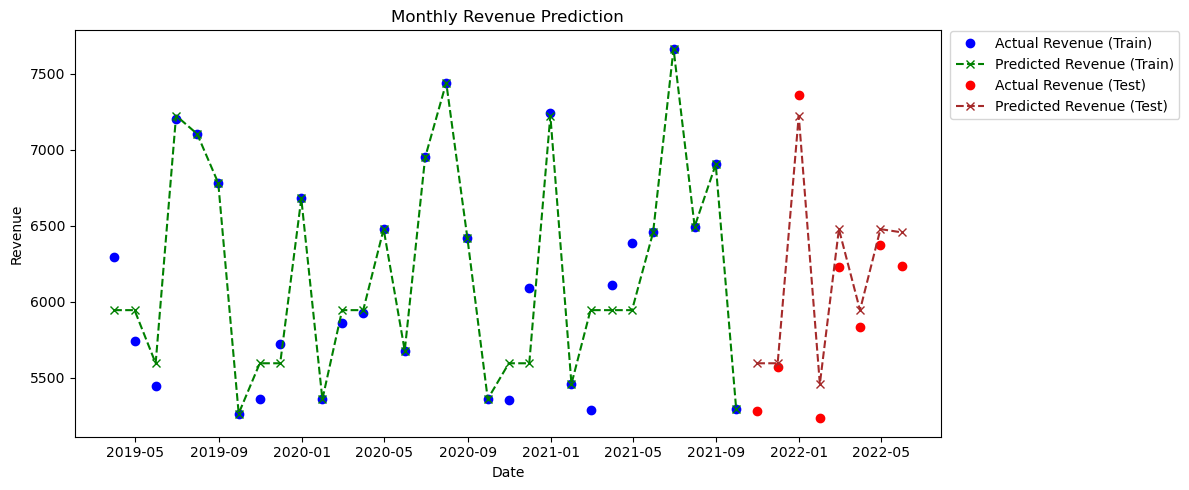

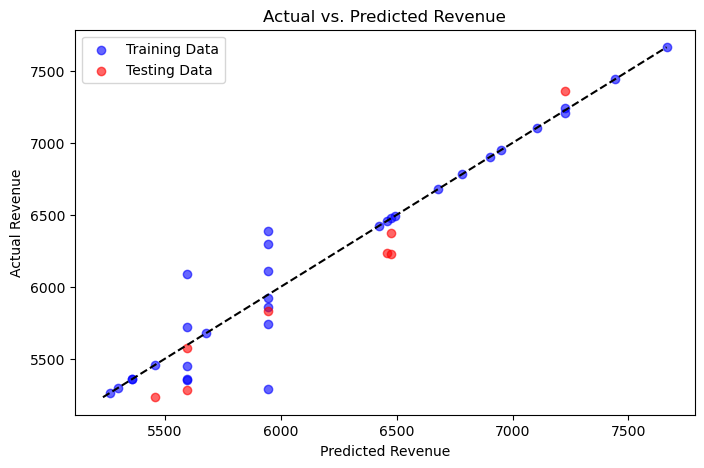

In [54]:
# Train a Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# call the function and get the DataFrame
metrics_DTR = evaluate_model(y_test, y_test_pred)
print(metrics_DTR)

plot_revenue_predictions(train, y_train, y_train_pred, test, y_test, y_test_pred)

## 5.2. Random Forest Regression (RFR)

                           Metric       Value
0       Mean Absolute Error (MAE)  244.121637
1  Root Mean Squared Error (RMSE)  309.217030
2                        R² Score    0.774857


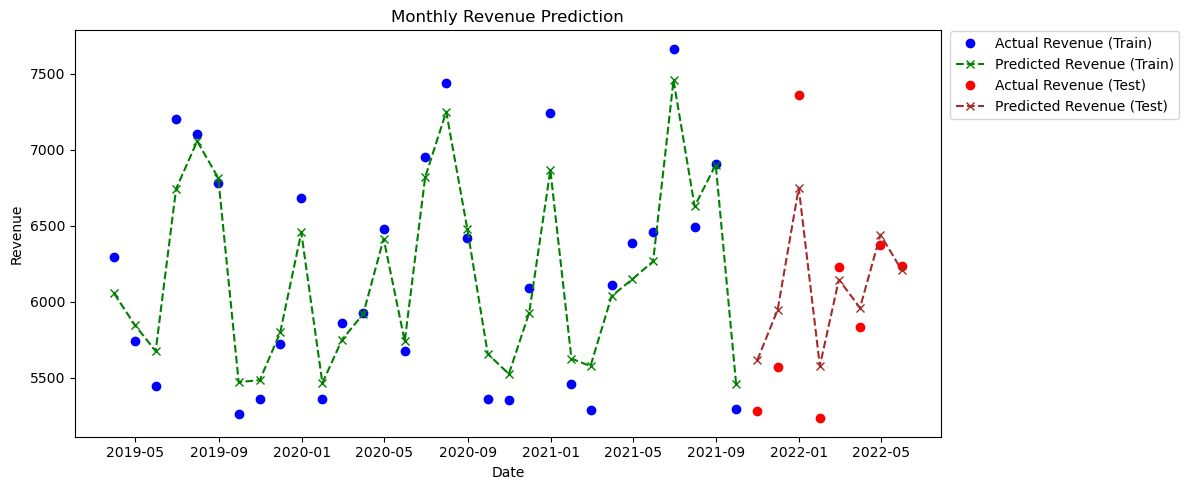

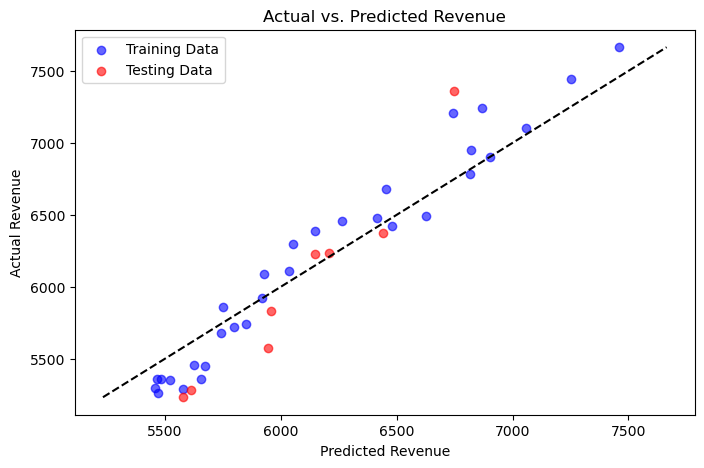

In [55]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)    

# call the function and get the DataFrame
metrics_RFR = evaluate_model(y_test, y_test_pred)
print(metrics_RFR)

plot_revenue_predictions(train, y_train, y_train_pred, test, y_test, y_test_pred)

## 5.3. XGBoost Regression (XGBR)

                           Metric       Value
0       Mean Absolute Error (MAE)  278.452073
1  Root Mean Squared Error (RMSE)  357.804012
2                        R² Score    0.698546


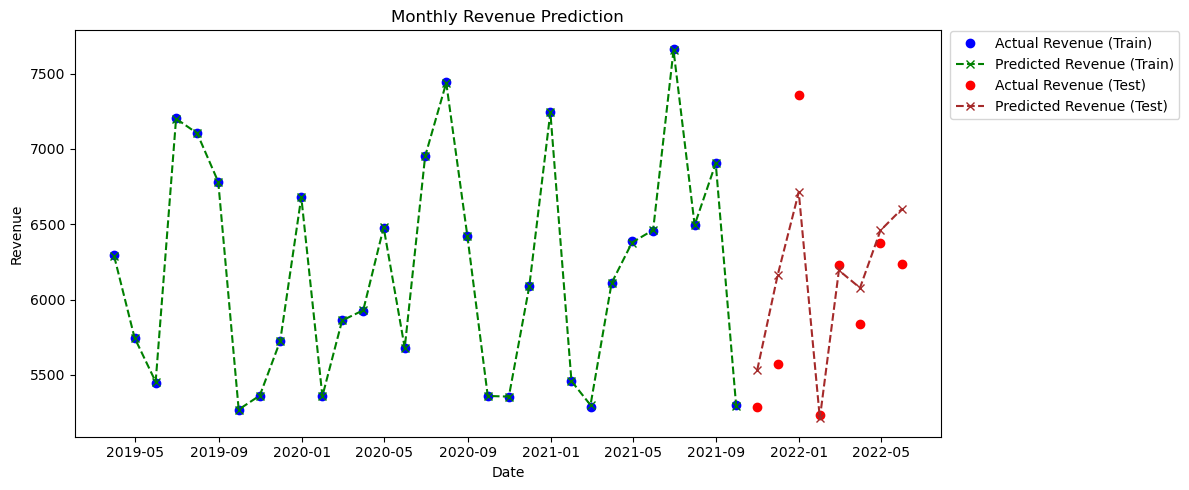

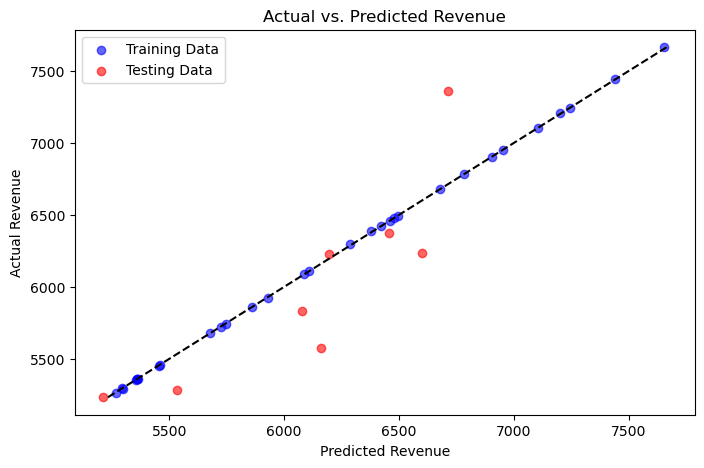

In [56]:
# Train an XGBoost Regressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)   

# Evaluating the model
metrics_XGBR = evaluate_model(y_test, y_test_pred)
print(metrics_XGBR)

plot_revenue_predictions(train, y_train, y_train_pred, test, y_test, y_test_pred)

## 5.4. Comparing Machine Learning Models

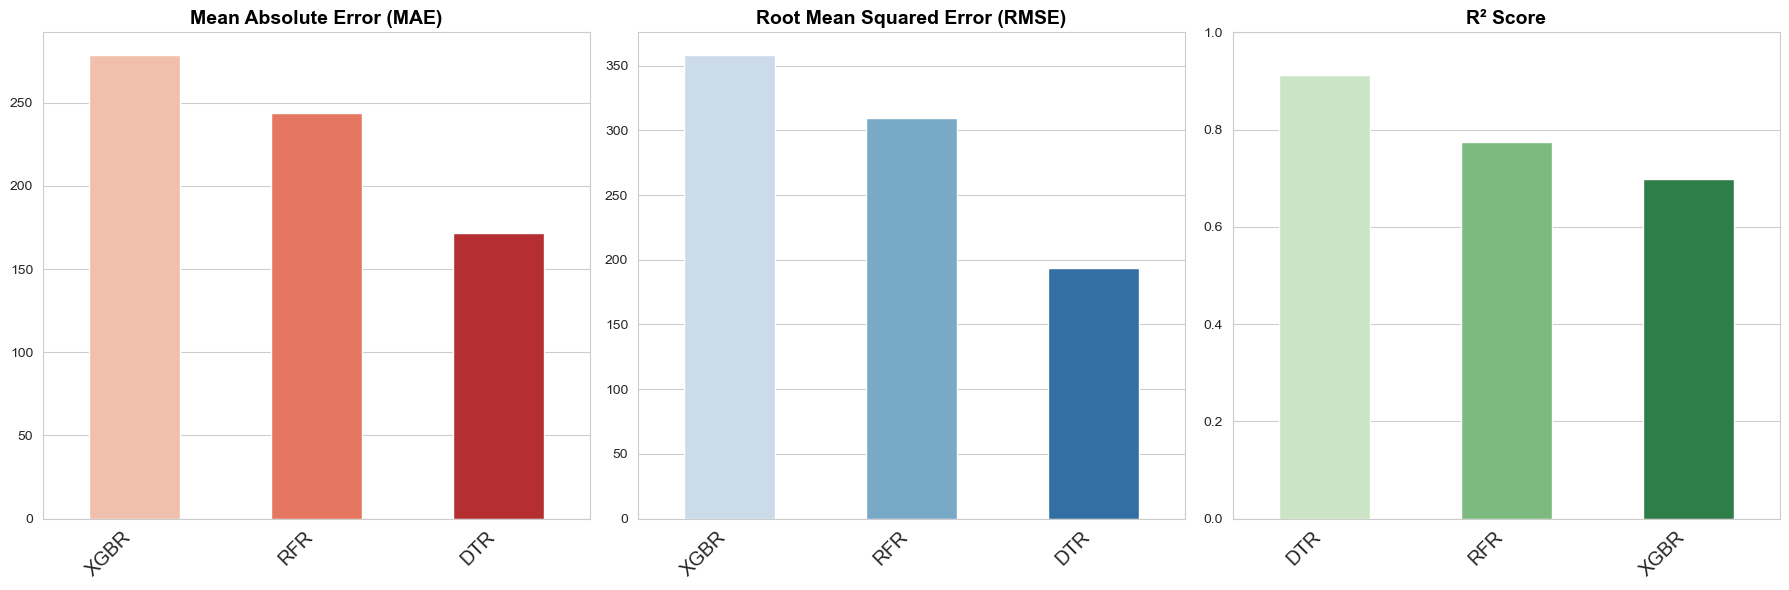

In [57]:
# Add a new column for each model’s metrics
metrics_DTR['Model'] = 'DTR'
metrics_RFR['Model'] = 'RFR'
metrics_XGBR['Model'] = 'XGBR'

# Concatenate the metrics DataFrames into one
combined_metrics = pd.concat([metrics_DTR, metrics_RFR, metrics_XGBR], ignore_index=True)

# Pivot the table to have the metrics as columns and the models as rows
pivoted_metrics = combined_metrics.pivot(index='Metric', columns='Model', values='Value')

# Rename index for consistency
pivoted_metrics.rename(index={
    'Mean Absolute Error (MAE)': 'MAE',
    'Root Mean Squared Error (RMSE)': 'RMSE',
    'R² Score': 'R2 Score'
}, inplace=True)

# Set plot style
sns.set_style("whitegrid")

# Adjusting figsize to make the graphs taller
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Height adjusted

# Sorting order for each metric
mae_order = pivoted_metrics.loc['MAE'].sort_values(ascending=False)
rmse_order = pivoted_metrics.loc['RMSE'].sort_values(ascending=False)
r2_order = pivoted_metrics.loc['R2 Score'].sort_values(ascending=False)

# Create color gradients for each metric
mae_colors = sns.color_palette("Reds", len(mae_order))
rmse_colors = sns.color_palette("Blues", len(rmse_order))
r2_colors = sns.color_palette("Greens", len(r2_order))

# MAE Plot with adjusted bar width
sns.barplot(x=mae_order.index, y=mae_order.values, ax=axes[0], palette=mae_colors, width=0.5)
axes[0].set_title('Mean Absolute Error (MAE)', fontsize=14, fontweight='bold', color='black')
axes[0].set_ylabel('') 
axes[0].set_xlabel('')

# RMSE Plot with adjusted bar width
sns.barplot(x=rmse_order.index, y=rmse_order.values, ax=axes[1], palette=rmse_colors, width=0.5)
axes[1].set_title('Root Mean Squared Error (RMSE)', fontsize=14, fontweight='bold', color='black')
axes[1].set_ylabel('') 
axes[1].set_xlabel('')

# R² Score Plot with adjusted bar width
sns.barplot(x=r2_order.index, y=r2_order.values, ax=axes[2], palette=r2_colors, width=0.5)
axes[2].set_title('R² Score', fontsize=14, fontweight='bold', color='black')
axes[2].set_ylabel('')  # Remove y-axis title
axes[2].set_xlabel('')
axes[2].set_ylim(0, 1)

# Improve x-axis label clarity and increase font size
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14, ha='right')  

# Adjust layout and display the plots
plt.tight_layout()
plt.show()



<div style="font-size:18px; line-height:2;">
As shown in the comparison results, the Decision Tree Regressor (DTR) has the highest R² score (0.91) and the lowest mean absolute error (MAE) and root mean squared error (RMSE) values. Thus, the Decision Tree Regressor shows the best predictive performance and provides more accurate and reliable results compared to the XGBR and RFR models.

## 5.5. Forecasting Future Revenue Using Decision Tree Regression

<div style="font-size:18px; line-height:2;">
Since the Decision Tree Regressor shows the best performance, it will be implemented to forecast the total revenue for the next two years.

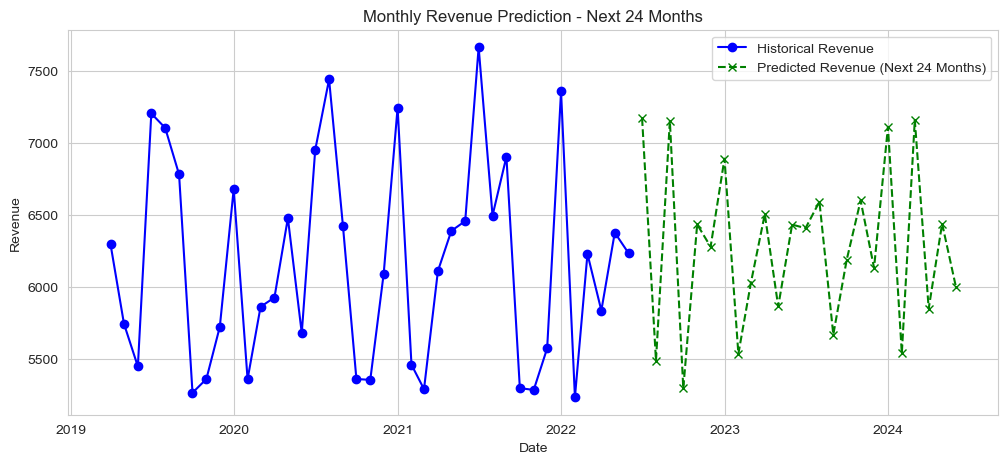

            total_revenue
2022-06-30    7171.048828
2022-07-31    5488.569824
2022-08-31    7152.465820
2022-09-30    5295.195312
2022-10-31    6433.615723
2022-11-30    6278.668457
2022-12-31    6890.580078
2023-01-31    5534.776367
2023-02-28    6028.907715
2023-03-31    6504.659180
2023-04-30    5864.099609
2023-05-31    6432.290527
2023-06-30    6407.909668
2023-07-31    6591.426270
2023-08-31    5668.553711
2023-09-30    6189.224121
2023-10-31    6599.943359
2023-11-30    6131.866699
2023-12-31    7110.187012
2024-01-31    5538.342285
2024-02-29    7158.994629
2024-03-31    5848.895020
2024-04-30    6439.155273
2024-05-31    5997.457520
<class 'xgboost.sklearn.XGBRegressor'>


In [58]:
# Generate future dates for the next 24 months
future_dates = pd.date_range(start=df_monthly.index[-1] + pd.DateOffset(months=1), periods=24, freq="M")

# Create a DataFrame with future features
future_df = pd.DataFrame({
    "year": future_dates.year,
    "month": future_dates.month,
    "lag_1": np.nan,
    "rolling_mean_3": np.nan
}, index=future_dates)

# Initialize lag and rolling mean with the last known values
future_df.iloc[0, future_df.columns.get_loc("lag_1")] = df_monthly["total_revenue"].iloc[-1]
future_df.iloc[0, future_df.columns.get_loc("rolling_mean_3")] = df_monthly["rolling_mean_3"].iloc[-1]

# Predict future revenues iteratively
for i in range(len(future_df)):
    X_future = future_df.iloc[i][["year", "month", "lag_1", "rolling_mean_3"]].values.reshape(1, -1)
    future_df.loc[future_df.index[i], "total_revenue"] = model.predict(X_future)[0]
    
    if i + 1 < len(future_df):  # Set next month's lag_1 and rolling mean
        future_df.loc[future_df.index[i + 1], "lag_1"] = future_df.loc[future_df.index[i], "total_revenue"]
        future_df.loc[future_df.index[i + 1], "rolling_mean_3"] = future_df["lag_1"].iloc[max(0, i - 1):i + 1].mean()

# Plot the predicted revenue for the next 24 months
plt.figure(figsize=(12, 5))
plt.plot(df_monthly.index, df_monthly["total_revenue"], label="Historical Revenue", color="blue", marker="o", linestyle="-")
plt.plot(future_df.index, future_df["total_revenue"], label="Predicted Revenue (Next 24 Months)", color="green", linestyle="--", marker="x")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Monthly Revenue Prediction - Next 24 Months")
plt.legend()
plt.show()

# Display results
print(future_df[["total_revenue"]])
print(type(model))


# 6. Recommendations


<div style="font-size:18px; line-height:2;">
 
-  Consider boosting seasonal campaigns by intensifying promotions during June and December. These months naturally see higher consumer spending—June thanks to financial year-end deals and December due to the holiday season.

- Implement personalized promotions and loyalty rewards to turn first-time buyers and promiscuous shoppers into regular, loyal customers.

- Develop family-focused promotions and expand the range of female-friendly products to boost revenue from these key groups.

- Invest in strategies to build lasting relationships with younger consumers, as this demographic not only dominates in size and revenue but also promises long-term growth.

- Finally, broaden the range of popular commodities—such as beef, cheese, and frozen meat—to align more closely with customer preferences for protein-rich and dairy products.

